# Quantitative Finance with Python

### Alan Moreira, University of Rochester Simon Graduate School of Business

# Notebook 8




### Topics covered
* * *
* Strategy Evaluation
  * Time-series alpha 
  * Interpretation of alpha as a test of whether factor is tangency portfolio
  * CAPM alpha
  * Multi-factor alpha
  * GRS test
* Tracking portfolios
* Hedged portfolios
* Alpha investing


 

### Time-Series Alpha Test



- Start with a reference portfolio, $R^*$

- That is the "portfolio" to be beaten

- Loosely speaking, you can think as the benchmark

- To make it concrete you can think as the market portfolio

- But it does NOT need to be

- For asset $i$, where asset $i$ can be a portfolio, run the time series regression 

$$R_{i,t}^e =\alpha_i+\beta_{i,M} R_{t}^{*,e}+\epsilon_i$$

- where e denote that these are excess returns, returns in excess of the risk-free rate

Test if $\alpha_i \neq 0$

- It doesn't matter if positive or negative, since you can always go short

- YOu basically do a standard t-test 

$$t=\frac{\alpha }{\sigma(\alpha)}$$

We say

 - if $|t|\geq 1.64$ there is a 10% chance that the market is MVE
 - if $|t|\geq 1.96$ there is a 5% chance that the market is MVE
 - if $|t|\geq 2.1$ there is a 2.5% chance that the market is MVE
 - if $|t|\geq 2.6$ there is a 1% chance that the market is MVE
 
 
 * The Time-series regression asks the following question:
 
 
 > Can I replicate  the average return I get in asset i by investing in the reference portfolio?
 
 * Having a non-zero alpha DOES NOT mean that you prefer asset i to the reference portfolio!
 
 * But it does mean, that you can do better by investing in both assets
   - Obviously with a negative weight if the alpha is negative
   - and a positive weight if the alpha is positive
   
 * The alpha test literally asks in the reference portfolio is tangency portfolio with respect to the investment opportunity that includes the test asset (the asset in the left of the regression) and the reference portfolio (the asset on the right)
 
 * a differet way to put it is that a non-zero alpha means that the asset expands the mean-variance frontier relative to an opportunity set that only has the reference portfolio
 
 
 > Recall that we proved in notebook 4 that if a portfolio is tangency with respect to a set of assets than it must be the case that or any of these assets it must be that
 
 $$E[R_i^e]=\beta_{i,T}E[R^{T,e}]$$
 
where $R^{T,e}$ are the excess returns on the tangency portfolio.
 
Note that the regression alpha test is simply a test of whether this relationship is true
 
To see this note that the regression equation:

$$R_{i,t}^e =\alpha_i+\beta_{i,M} R_{t}^{*,e}+\epsilon_i$$

Taking expected values

$$E[R_{i,t}^e] =\alpha_i+\beta_{i,M} E[R_{t}^{*,e}]+E[\epsilon_i]$$

$$E[R_{i,t}^e] =\alpha_i+\beta_{i,M} E[R_{t}^{*,e}]$$


So the reference portfolio is tangecy if and only if $\alpha_i=0$!




> I show that Asset A has alpha with respect to Asset B. Does it mean that an investor should prefer asset A to asset B?

### CAPM: Market portfolio is the tangency portfolio

* The most used reference portfolio is the market portoflio

* So we will do our first alpha test with respect to the market

 

In [1]:
# First we start loading our favourite packages with the names we used to
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
# import regression package
import statsmodels.api as sm

- import market factor as our reference portfolio

In [2]:

url = "https://www.dropbox.com/s/9346pp2iu5prv8s/MonthlyFactors.csv?dl=1"
Factors = pd.read_csv(url,index_col=0, 
                         parse_dates=True,na_values=-99)
# keep only market and RF
Factors=Factors.iloc[:,0:2]/100
Factors.head()



,RF,MKT
Date,,
1926-07-31,0.0022,0.0318
1926-08-31,0.0025,0.0289
1926-09-30,0.0023,0.0059
1926-10-31,0.0032,-0.0292
1926-11-30,0.0031,0.0284


- Import our test assets: Value portfolios (Book to Market sorted portfolios) from Ken French website

- This is the same tradign strategy that we did across industries but here is done across stocks

In [3]:
# import BEME (Book-equity over Market equity) sorted portfolios
# BEME 1 has low book to market- > Known as growth stocks (example: Tesla, Amazon, Facebook)

# BEME 10 has high book to market -> Known as value stocks ( old firms: utilities, banks, insurance companies)

# but it changes....

url = "https://www.dropbox.com/s/gds8ho9rt1imw03/Valueportfolios.csv?dl=1"
parser = lambda date: pd.to_datetime(date,format='%Y%m')
Data = pd.read_csv(url,index_col=0, 
                         parse_dates=True,date_parser=parser,skiprows=23,nrows=1092,na_values=-99.99)


# neeed to adjsut the date to end of month convention (Even thugh both returns for a given month are end-of-month to end of month,
# when we importer the value portfolios python used as date the first day of the month . To fix that, we will convert it to end of month
# It is important to do that before the merge. Why? )
Data.index=Data.index+pd.tseries.offsets.MonthEnd()
(Data.head())
# ready to merge with Market and RF

Data=Data/100

* merge test assets with factors

In [4]:
df=pd.merge(Data,Factors,left_index=True,right_index=True)
df.head()

,BEME1,BEME2,BEME3,BEME4,BEME5,BEME6,BEME7,BEME8,BEME9,BEME10,RF,MKT
1926-07-31,0.0463,0.0124,0.1140,0.0168,0.0150,0.0209,0.0273,0.0158,0.0063,0.0052,0.0022,0.0318
1926-08-31,0.0015,0.0218,0.0640,0.0238,0.0158,0.0263,0.0446,0.0494,0.0831,0.0392,0.0025,0.0289
1926-09-30,-0.0011,-0.0230,0.0632,0.0073,-0.0089,0.0038,-0.0028,0.0017,-0.0216,0.0044,0.0023,0.0059
1926-10-31,-0.0378,-0.0163,-0.0501,-0.0141,-0.0231,-0.0210,-0.0465,-0.0280,-0.0546,-0.0117,0.0032,-0.0292
1926-11-30,0.0603,0.0149,0.0111,0.0363,0.0197,0.0180,0.0400,0.0385,0.0277,0.0176,0.0031,0.0284


* transform in excess returns

In [5]:

df.iloc[:,0:10]=df.iloc[:,0:10].subtract(df['RF'],axis=0)
df.iloc[:,11]=df.iloc[:,11].subtract(df['RF'],axis=0)
# take the risk-free rate column out of the database
del df['RF']
df.head()

,BEME1,BEME2,BEME3,BEME4,BEME5,BEME6,BEME7,BEME8,BEME9,BEME10,MKT
1926-07-31,0.0441,0.0102,0.1118,0.0146,0.0128,0.0187,0.0251,0.0136,0.0041,0.0030,0.0296
1926-08-31,-0.0010,0.0193,0.0615,0.0213,0.0133,0.0238,0.0421,0.0469,0.0806,0.0367,0.0264
1926-09-30,-0.0034,-0.0253,0.0609,0.0050,-0.0112,0.0015,-0.0051,-0.0006,-0.0239,0.0021,0.0036
1926-10-31,-0.0410,-0.0195,-0.0533,-0.0173,-0.0263,-0.0242,-0.0497,-0.0312,-0.0578,-0.0149,-0.0324
1926-11-30,0.0572,0.0118,0.0080,0.0332,0.0166,0.0149,0.0369,0.0354,0.0246,0.0145,0.0253


* Import regression package

In [6]:

import statsmodels.api as sm


In [7]:
temp=df['1963':'2018'] 
x= sm.add_constant(temp['MKT'])
y= temp['BEME10']
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BEME10   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1365.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):          4.64e-162
Time:                        12:53:40   Log-Likelihood:                 1274.4
No. Observations:                 654   AIC:                            -2545.
Df Residuals:                     652   BIC:                            -2536.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.001      2.456      0.014       0.001       0.006
MKT            1.1358      0.031     36.950      0.000       1.075       1.196
==============================================================================
Omnibus:                      122.691   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.658
Skew:                           0.771   Prob(JB):                    2.19e-121
Kurtosis:                       7.244   Cond. No.                         22.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
x.mean()*12

const    12.000000
MKT       0.063508
dtype: float64

In [9]:
def TSregression(temp):
    E=pd.DataFrame(temp.mean())
    E.columns=['AvgReturns']
    x= sm.add_constant(temp['MKT'])
    E['std']=temp.std()
    E['alpha']=E['AvgReturns']*0
    E['std_e']=E['AvgReturns']*0
    E['beta']=E['AvgReturns']*0
    E['std_beta']=E['AvgReturns']*0
    E['std_alpha']=E['AvgReturns']*0
    for portfolios in E.index[0:10]:
        y= temp[portfolios]
        results= sm.OLS(y,x).fit()
        E.at[portfolios,'alpha']=results.params[0]
        E.at[portfolios,'beta']=results.params[1]
        E.at[portfolios,'std_e']=results.resid.std()
        E.at[portfolios,'std_alpha']=results.HC0_se[0]
        E.at[portfolios,'std_beta']=results.HC0_se[1]          
        E.at[portfolios,'pvalues']=results.pvalues[0] 
    
    E['t-stat']=E['alpha']/E['std_alpha']
    E.at['MKT','beta']=1 
    return E

In [10]:
# Lets select a sample to do our analysis

# this is a sample that I know that the value puzzle is strong

df1=df['1963':'2008'].copy()

In [11]:

TSresults=TSregression(df1)
TSresults

,AvgReturns,std,alpha,std_e,beta,std_beta,std_alpha,pvalues,t-stat
BEME1,0.002633,0.051875,-0.001670,0.018894,1.087229,0.022621,0.000804,0.039237,-2.076055
BEME2,0.004435,0.047174,0.000406,0.013403,1.017861,0.016841,0.000579,0.478756,0.701379
BEME3,0.004570,0.046801,0.000606,0.014484,1.001517,0.017918,0.000622,0.328583,0.974186
BEME4,0.004326,0.046323,0.000506,0.017504,0.965178,0.024910,0.000754,0.499460,0.671199
BEME5,0.004209,0.043893,0.000684,0.018990,0.890555,0.023632,0.000809,0.399789,0.846065
BEME6,0.005645,0.042997,0.002258,0.020069,0.855763,0.026951,0.000867,0.008767,2.604779
BEME7,0.005388,0.045406,0.001837,0.021740,0.897081,0.035156,0.000950,0.048669,1.933668
BEME8,0.006524,0.044972,0.003033,0.022062,0.881915,0.033259,0.000960,0.001384,3.159839
BEME9,0.007893,0.047845,0.004194,0.023751,0.934688,0.033279,0.001012,0.000042,4.142106
BEME10,0.008723,0.056422,0.004544,0.031342,1.055797,0.045357,0.001342,0.000749,3.386714


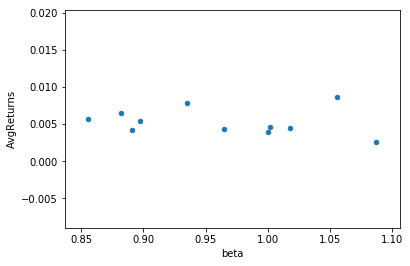

In [12]:
TSresults.plot.scatter(x='beta',y='AvgReturns')

> How should this plot look like if the Market was tangency as predicted by the CAPM?

> Is the market likely to be tangency?

* The value strategy is interesting not because value stocks have higher expected returns

* The Value strategy in interesting because these expected returns do not line up with market betas!

* And therefore, an investor that only holds the market can benefitr by tilting his portfolio twoards value stocks

* BOOK to MARKET sorted portfolios risk-return relation is not explained by the CAPM

1. Value portfolios have very large alphas with respect to the market portfolio.
    - Portfolio 9 rejects the CAPM with a confidence of more than 99.99%
2. A long-short strategy is likely to blow the CAPM out of the water even more strongly
    - Value and growth portfolios have similar betas but very different returns!
    - One can use the growth portfolio to hedge market exposure cheaply since it has high beta but low returns!

* The "Value" minus "growth" strategy:

In [13]:
x= sm.add_constant(df1['MKT'])
y= df1['BEME10']-df1['BEME1']
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5501
Date:                Wed, 09 Oct 2019   Prob (F-statistic):              0.459
Time:                        12:53:41   Log-Likelihood:                 939.41
No. Observations:                 552   AIC:                            -1875.
Df Residuals:                     550   BIC:                            -1866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0062      0.002      3.290      0.001       0.003       0.010
MKT           -0.0314      0.042     -0.742      0.459      -0.115       0.052
==============================================================================
Omnibus:                       32.868   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.773
Skew:                           0.405   Prob(JB):                     2.85e-13
Kurtosis:                       4.363   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
y= df1.BEME10-df1.BEME1
print('average returns')
print([y.mean()*12,df.MKT.mean()*12])
print('Sharpe')
print([y.mean()/y.std()*12**0.5,df1.MKT.mean()/df1.MKT.std()*12**0.5])
print('correlation')
print(np.corrcoef(y,df1.MKT)[1,0])

average returns
[0.07307826086956516, 0.07880659340659345]
Sharpe
[0.47744199990298714, 0.3085380171502428]
correlation
-0.03161039631597113


### Economic Magnitudes

- How large is the failure of the CAPM?
- How much better can I do by trading value?

In [15]:
TSresults.loc[['MKT','BEME10'],:]

,AvgReturns,std,alpha,std_e,beta,std_beta,std_alpha,pvalues,t-stat
MKT,0.003958,0.044436,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN
BEME10,0.008723,0.056422,0.004544,0.031342,1.055797,0.045357,0.001342,0.000749,3.386714


A decomposition

$$average(R_{BEME10,t})=\beta*average(R_{Mkt})+\alpha$$

In [16]:
print([TSresults.loc['BEME10','beta']*TSresults.loc['MKT','AvgReturns']*12,TSresults.loc['BEME10','alpha']*12])

#print([TSresults.loc['BEME10','beta']*TSresults.loc['MKT','AvgReturns']/TSresults.loc['BEME10','AvgReturns']\
#       ,TSresults.loc['BEME10','alpha']]/TSresults.loc['BEME10','AvgReturns'])

print([TSresults.loc['BEME10','alpha'],TSresults.loc['MKT','AvgReturns']])

[0.05014345010963228, 0.054530462933846]
[0.004544205244487167, 0.003957789855072465]


1. alpha is a large fraction of the market risk premium

2. Alpha is a large fraction of the value portfolio overall risk premium


In [17]:
np.array([TSresults.loc['BEME10',:].AvgReturns/TSresults.loc['BEME10','std'],\
 TSresults.loc['MKT',:].AvgReturns/TSresults.loc['MKT','std'],\
         TSresults.loc['BEME10',:].alpha/TSresults.loc['BEME10',:].std_e])*12**0.5

array([0.53555305, 0.30853802, 0.50224566])

2. Sharpe ratio of the orthogonal component larger than the market sharpe ratio

3. Own Sharpe ratio higher than the market 

Rejection is economically large

A Mean Variance Investor (without other risky income beyond dividends from stocks) can benefit alot by deviating from the market portfolio

How much better exactly?

# Alpha Investing



1. Tracking portfolios
2. Hedged portfolio or portable alpha portfolio
3. Appraisal ratio can be recovered from the t-stat
4. Optimal portfolio combination of alpha and market




In [18]:
TSresults

,AvgReturns,std,alpha,std_e,beta,std_beta,std_alpha,pvalues,t-stat
BEME1,0.002633,0.051875,-0.001670,0.018894,1.087229,0.022621,0.000804,0.039237,-2.076055
BEME2,0.004435,0.047174,0.000406,0.013403,1.017861,0.016841,0.000579,0.478756,0.701379
BEME3,0.004570,0.046801,0.000606,0.014484,1.001517,0.017918,0.000622,0.328583,0.974186
BEME4,0.004326,0.046323,0.000506,0.017504,0.965178,0.024910,0.000754,0.499460,0.671199
BEME5,0.004209,0.043893,0.000684,0.018990,0.890555,0.023632,0.000809,0.399789,0.846065
BEME6,0.005645,0.042997,0.002258,0.020069,0.855763,0.026951,0.000867,0.008767,2.604779
BEME7,0.005388,0.045406,0.001837,0.021740,0.897081,0.035156,0.000950,0.048669,1.933668
BEME8,0.006524,0.044972,0.003033,0.022062,0.881915,0.033259,0.000960,0.001384,3.159839
BEME9,0.007893,0.047845,0.004194,0.023751,0.934688,0.033279,0.001012,0.000042,4.142106
BEME10,0.008723,0.056422,0.004544,0.031342,1.055797,0.045357,0.001342,0.000749,3.386714


### Tracking portfolios

Are the portfolios that use a set of factors to track the returns on an asset.

It can be used as way to construct hedges for corporations, hedges for trading strategies, or ways to define a benchmark for an active management.

It is used to construct what people in the industry calls "portable alpha", because it allows one to separate the alpha of the factor exposure of a trading strategy

The idea of the tracking portoflio is to track the component of an asset return that can be obtained by investing in a simple traded factor. For now, this means the market portfolio

How to do it?

For a given trading strategy consider the following relation

$$R^e_i=\alpha_i+\beta_iR^{MKT}+\epsilon_i, $$

with $var(\epsilon_i)=\sigma_e^2$

the i Tracking portfolio is $\beta_iW^{MKT}$, where $W^{MKT}$ is the vector of weights of the market portfolio.

of if one is trading directly on the total market portfolio as an asset, the tracking portfolio weight on the market portfolio asset is simply $\beta_i$


In [19]:
TSresults.loc['BEME10','beta']

1.055796541879015

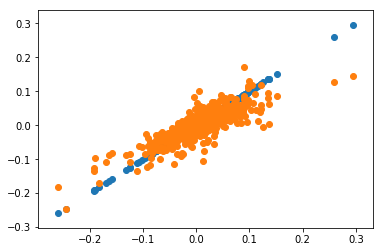

In [20]:
# Returns on the tracking portfolio

Tracking=df1['MKT']*TSresults.loc['BEME10','beta']


# (Tracking/100+1).cumprod().plot()
# (Data['BEME10']/100+1).cumprod().plot()
plt.scatter(x=df1['BEME10'],y=df1['BEME10'])
plt.scatter(x=df1['BEME10'],y=Tracking)

2.The Hedged strategy return is (also called portable alpha)

$$R^{hedged}_i=R^e_i-\beta_iR^{MKT}$$

where this portoflio can be constructed simply by $W^i-\beta^iW^{MKT}$, the weights of the trading strategy minus the tracking portfolio weights. Thik of the excess returns taking out risk-free rate effects and the hedged portfolio taking out market factor effects

a few observations

- the mean return of the hedge portfolios is just the Time series alpha!

- the vol of the strategy is the vol of the residuals of the Time series regression

- If you run a regression on the market you will see that the hedged portfolios have $\beta=0$. This is by construction That is the reason sometimes people call these portfolios "Pure alpha" or a Bridgwater calls it, "Portable alpha"

- By construction, becuase we hedged market risk, The entire SR is enhancing the MV frontier relative to the CAPM


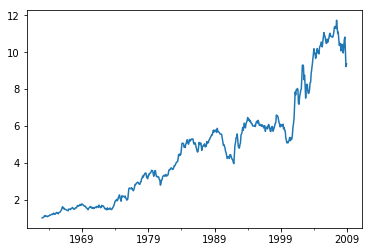

In [21]:
# Returns on the hedged portfolio
# portfolio - tracking portfoloio

Hedged=df1.BEME10.subtract(Tracking,axis=0)
(Hedged+1).cumprod().plot()

In [22]:
print('hedge portfolio excess returns')
print(Hedged.mean()*12)
print('alpha of unhedge portfolio')
print(TSresults.loc['BEME10','alpha']*12)


hedge portfolio excess returns
0.05453046293384607
alpha of unhedge portfolio
0.054530462933846


3.Appraisal is the sharpe ratio on the hedged portfolio

$$Appraisal=\alpha_i/\sigma_i=E[R^{Hedged}]/\sigma(R^{Hedged})$$



In [23]:
# Aprraisal ratio is the sharpe ratio of hedged portfolio

# sharpe ratio of the asset after you purge of market exposure

print(Hedged.mean()/Hedged.std())

print(TSresults.loc['BEME10','alpha']/TSresults.loc['BEME10','std_e'])

0.14498583207325186
0.14498583207325166


There is a tight link between t-stats of time-series regressions and appraisal ratios

$$Appraisal=\alpha_i/\sigma_i$$

Note that $\sigma(\alpha)=\sigma(\epsilon_i)/\sqrt{T}$, therefore

$$Appraisal=\frac{\alpha_i}{\sigma(\alpha)\sqrt{T}}=\frac{T_{stat}}{\sqrt{T}}$$

In [24]:
# link with t-statistic

print('appraisal ratio')
print(Hedged.mean()/Hedged.std())
T=Hedged.shape[0]
tstat=TSresults.loc['BEME10','alpha']/TSresults.loc['BEME10','std_alpha']
print('t-stat')
print(tstat)
print(tstat/(T**0.5))

appraisal ratio
0.14498583207325186
t-stat
3.386714486088657
0.14414814120491143



4.Optimal portfolio combination of alpha and market


- How to optimally combine the Hedged portfolio with the Market?

- Recall our formula for the tangency portfolio weights derived in Lecture 3.

$$W^*\propto Var(R^e)^{-1}E[R^e]$$

- now this becomes really simple because the covariance of the new Hedged-MVE strategy is zero with the market


$$Var(R^e)=\left[\begin{array}{cc} \sigma^2(R_{MKT}^e) & 0\\0 & \sigma^2(R_{Hedged,i})\end{array}\right]$$



- So the optimal weights are just

$$W^* \propto \left[\begin{array}{c} \frac{E[R^e_{MKT}]}{\sigma^2(R_{MKT}^e)} \\ \frac{\alpha}{\sigma^2(R_{Hedged,i})}\end{array}\right]$$


- You invest in each strategy according to the strengh of the risk-return trade-off in the strategy

- The symbol $\propto$ means that you have to invest proportionally

- But how much you invest overall will depend on how much risk you want to take





In [25]:
# optimal combination

W=np.array([df1.MKT.mean()/df1.MKT.var(),Hedged.mean()/Hedged.var()])
W

array([2.00439537, 4.62586753])

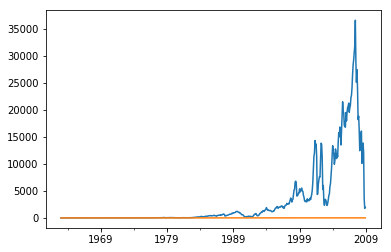

In [26]:
# optimal portfolio returns
Optimalportfolio=W[0]*df1['MKT']+W[1]*Hedged
# adjsut optimal portfolio to have same volatility as the market
(Optimalportfolio+1).cumprod().plot()
(df1.MKT+1).cumprod().plot()


* Recall that what matters are the relative weights, so you always need to normalize the weights to make it comparable

* Here we will reduce the level of weights so that ths vol of optimal portfolio is identical to the vol of the market


In [27]:
factor=df1.MKT.std()/Optimalportfolio.std()

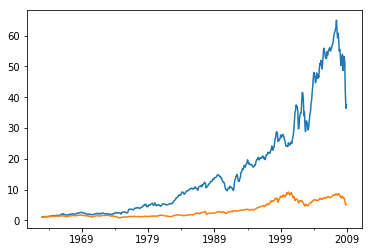

In [28]:

# adjsut optimal portfolio to have same volatility as the market
Optimalportfolio_l=Optimalportfolio*factor
(Optimalportfolio_l+1).cumprod().plot()
(df1.MKT+1).cumprod().plot()


In [29]:
df1.MKT.std()

0.04443597050361596

In [30]:
print(Optimalportfolio.mean()/Optimalportfolio.std()*12**0.5)
df1.MKT.mean()/df1.MKT.std()*12**0.5

0.5894458465802274


0.3085380171502428

5. How high a SR you get in the end?

  - You can compute your final SR by brute force. Simply computing the SR of the new portfolio.
  - Or more cleverly, you can find the resulting SR of optimally combining any two strategies that are ORTHOGONAL to each other as follows


$$SR_{final}=\sqrt{SR_{MKT}^2+SR_{Hedged}^2}$$

  - This is very general and  can be used any time you run time-series test.

In [31]:
# final SR
# empirical
print(Optimalportfolio.mean()/Optimalportfolio.std())
# analytical formula

((df1.MKT.mean()/df1.MKT.std())**2+(Hedged.mean()/Hedged.std())**2)**0.5


0.17015835909790056


0.17015835909790078

### A very neat trick: How to go from regression Tables to Final Sharpe Ratios

Inputs
- SR on the factor (market)
- t-stat on the alpha of a particular strategy on the factor
- T= total number of time-periods

- That is you run
$$R^e_i=\alpha_i+\beta_iR^{MKT}+\epsilon_i$$

Once you have the t-stat on the alpha, this gives you the SR on the hedged strategy once you divide by $\sqrt{T}$, i.e. we have that

$$SR(R^{Hedged})=t(\alpha)/\sqrt{T}$$

- using our fromula above the SR of the optimal portfolio combination can be written as


$$SR_{final}=\sqrt{SR(R^{MKT})^2+SR(R^{Hedged})^2}$$

$$SR_{final}=\sqrt{SR(R^{MKT})^2+(\alpha/\sigma(\epsilon))^2}$$

$$SR_{final}=\sqrt{SR(R^{MKT})^2+(t(\alpha)/\sqrt{T})^2}$$



- This gives you a convenient way to evaluate whether a given anomally meaningfully expand the investment opportunity set

- Recall that a 10% increase in SR means you can either earn 10% higher return while bearing the same vol or get the same return while bearing 10% less vol

# Data mining considerations.

You have data up to October/2018 and want to hedge market exposure on your trading strategy in the month of November/2018

You run a time-series regression using the entire sample and find your strategy had a beta of 0.7

Does shorting 0.7*market portfolio guarantee that your strategy will have zero beta in the month of november?





# Lecture 12 stopped here 10/7



# Multivariate time-series test


But this approach tests the model "Asset by Asset": We tested if there is any single portfolio that is inconsistent with the model.

But we can get much more power by using all the assets at the same time

- What if no single asset has a statisically significant alpha, could them together reject the model?

- Joining all the small SR can give a much higher overall SR and much stronger rejection of the model.

- This will also be relevant for investing. You want to invest on the overall portfolio has the higher SR and it is unlikely that it will be the individual portfolios. As long they are not perfectly correlated you will likely get something from combining them


### How to test the model using all the assets at the same time?

#### The answer is the GRS test

Run Time-series regression asset by asset

$$R_i^e =\alpha_i+\beta_{i,M} R_{M}^e+\epsilon_i$$

stack the alphas in a vector $\hat{\alpha}$

If you have N test assets you will have N time-series of residuals $\epsilon_i$

Use this to estimate the variance-covariance matrix of the assets  residual risk

$$\hat{\Sigma}_{\epsilon}=var([\epsilon_1,...,\epsilon_1])$$

This yield a N by N covariance matrix $\hat{\Sigma}_{\epsilon}$

$$T\left(1+\left(\frac{average(R^e_M)}{std(R^E_M)}\right)^2\right)^{-1}\hat{\alpha}\hat{\Sigma}_{\epsilon}^{-1}\hat{\alpha}' \sim Chi2(N)$$

> What is the big idea here?

* The test construct the maximum (squared) Appraisal ratio among the test assets 

$$\hat{\alpha}\hat{\Sigma}_{\epsilon}^{-1}\hat{\alpha}'$$

* and compare it with the (Squared) Sharpe ratio of the reference portfolio

$$(\frac{average(R^e_M)}{std(R^E_M)})^2$$

* under the null that the reference portfolio is tangency, the maximum appraisal should be zero

* but it can be positive due to chance

* distribution Chi2 tells us how likely is that given appraisal ratio is due to chance.

In [32]:
# creaty copies of the dataset
df1=df.copy()
Resid=df1.copy()

# Create the right hand side variable for the regression:
# vector os 1's (for the intercept) plus returns on the market
x= sm.add_constant(df1['MKT'])
# wea re going to use Resid to store the residuals of the regresion, so we are deleting the market column since we will
# only run regressions of the differetn portfolio on the market
del Resid['MKT']
# here we are just initiatinng a data frame where we will store the alpha of each portfolio
# so the preside operation that I am doing below, does not matter as long it returns a dataframe where the 
#columns are the portfolio names
E=pd.DataFrame(Resid.mean())
E.columns=['alpha']

#now I am going to loop through the portfolios and run a time-series regression for each just as before
for portfolios in E.index:
    y= df1[portfolios]
    results= sm.OLS(y,x).fit()
    # We are storing the alphas
    E.at[portfolios,'alpha']=results.params[0]
    # we are stroing the ENTIRE time-seires of regression residuals
    Resid.loc[:,portfolios]=results.resid

# We are now ready to perform the GRS test

# what information do we need?



In [33]:
Resid.head()

,BEME1,BEME2,BEME3,BEME4,BEME5,BEME6,BEME7,BEME8,BEME9,BEME10
1926-07-31,0.014954,-0.018492,0.082560,-0.016206,-0.017519,-0.013022,-0.007502,-0.021846,-0.035958,-0.041411
1926-08-31,-0.026911,-0.006361,0.035363,-0.006149,-0.013812,-0.004615,0.013020,0.015109,0.044637,-0.003028
1926-09-30,-0.006259,-0.029363,0.056870,0.001469,-0.015460,-0.003358,-0.009081,-0.006350,-0.030685,-0.004259
1926-10-31,-0.007463,0.010540,-0.022424,0.016935,0.005522,0.008139,-0.014051,0.004167,-0.018514,0.031429
1926-11-30,0.032401,-0.012819,-0.017071,0.006905,-0.009410,-0.012379,0.009031,0.004866,-0.009955,-0.023618



$$T\left(1+\left(\frac{average(R^e_M)}{std(R^E_M)}\right)^2\right)^{-1}\hat{\alpha}\hat{\Sigma}_{\epsilon}^{-1}\hat{\alpha}' \sim Chi2(N)$$

In [34]:
Resid.cov()

,BEME1,BEME2,BEME3,BEME4,BEME5,BEME6,BEME7,BEME8,BEME9,BEME10
BEME1,0.000320,0.000040,-0.000035,-0.000106,-0.000158,-0.000207,-0.000250,-0.000267,-0.000328,-0.000425
BEME2,0.000040,0.000240,0.000028,-0.000051,-0.000090,-0.000121,-0.000144,-0.000165,-0.000189,-0.000236
BEME3,-0.000035,0.000028,0.000216,0.000027,0.000018,-0.000014,-0.000024,-0.000047,-0.000051,-0.000080
BEME4,-0.000106,-0.000051,0.000027,0.000347,0.000141,0.000176,0.000140,0.000121,0.000120,0.000134
BEME5,-0.000158,-0.000090,0.000018,0.000141,0.000367,0.000208,0.000218,0.000215,0.000234,0.000242
BEME6,-0.000207,-0.000121,-0.000014,0.000176,0.000208,0.000554,0.000362,0.000354,0.000399,0.000435
BEME7,-0.000250,-0.000144,-0.000024,0.000140,0.000218,0.000362,0.000654,0.000476,0.000570,0.000683
BEME8,-0.000267,-0.000165,-0.000047,0.000121,0.000215,0.000354,0.000476,0.000775,0.000692,0.000846
BEME9,-0.000328,-0.000189,-0.000051,0.000120,0.000234,0.000399,0.000570,0.000692,0.001210,0.001266
BEME10,-0.000425,-0.000236,-0.000080,0.000134,0.000242,0.000435,0.000683,0.000846,0.001266,0.002336


In [35]:
# first the market moments
avgMkt=df1.MKT.mean()
stdMkt=df1.MKT.std()
# the size of the sample
T=df.shape[0]
# the inverse of the residual covariance matrix
invCov=np.matrix(np.linalg.inv(Resid.cov()))
# the chi statistic!
chi=T*(E.alpha.values @invCov@ E.alpha.values.T)/(1+(avgMkt/stdMkt)**2)
chi

matrix([[20.73445274]])

1. We need to compare this Chi2 statistic to the critical values of the Chi2 distribution with N degrees of freedom

In [36]:
from scipy.stats import chi2

In [38]:
# choose degress of freedom (number of test assets)
dfreedom=10
# critical threshold for 10%, 5%, 1%, 0.1%
print([chi2.ppf(1-0.1,dfreedom),chi2.ppf(1-0.05,dfreedom),chi2.ppf(1-0.01,dfreedom),chi2.ppf(1-0.001,dfreedom)])

# we can also look for the equivalent P-value

1-chi2.cdf(chi,dfreedom)


[15.987179172105263, 18.307038053275146, 23.209251158954356, 29.58829844507442]


array([[0.02302326]])

We reject with about 98% confidence.

There is less than a 0.1% chance that this abnormal performance of Book-to-Market sorted portfolios were a statistical fluke 

In [39]:
# the GRS test

def GRS(df):
    Resid=df.copy()
    x= sm.add_constant(df['MKT'])
    del Resid['MKT']
    E=pd.DataFrame(Resid.mean())
    E.columns=['alpha']
    for portfolios in E.index:
        y= df[portfolios]
        results= sm.OLS(y,x).fit()
        E.at[portfolios,'alpha']=results.params[0]
        Resid.loc[:,portfolios]=results.resid
     
        
    avgMkt=df.MKT.mean()
    stdMkt=df.MKT.std()
    T=df.shape[0]
    invCov=np.linalg.inv(Resid.cov())
    chi=T*(1+(avgMkt/stdMkt)**2)**(-1)*(E.alpha.values @invCov@ E.alpha.values.T)
    N=Resid.shape[1]
    return [chi,(1-chi2.cdf(chi,N))*100]

In [56]:
chi=GRS(df['1992':'2016'])
chi


[17.345356730132607, 6.706295598443168]

In [40]:
chi=GRS(df['1926':'1963'])
chi

[15.105593394978444, 12.82592745559209]

In [41]:
chi=GRS(df['1963':'1992'])
chi

[22.951877443477233, 1.092560720775837]

* This sounds complicated!

* It is not, the idea is that you are constructing the maximum Sharpe ratio across all these test assets

* And then asking if that best combonation beats the reference portfolio

* to get the intuition I like to also think about "a quick and dirty" version of the GRS

### Quick and dirty (and perhaps more intuitive) GRS

1. Construct the tangency portfolio among the test assets

$$R_t^{e,T}=\hat{E}[R^e]'\hat{\Sigma}(R^e)^{-1} R^e_t$$

2. Do the standard uni-variate test using $R_t^{e,T}$ as a test asset


3. The idea here is that the tangency portfolio summarizes the best SR among the assets, and therefore it is the portfolio that has the most power to reject the reference model

4. The issue is that the GRS test takes into account that the tangency portfolio weights were estiamted in the sample, so this test will tend to "reject" too often, because it does not take into account that the standard deviation of the residuals should actually be larger

In [ ]:
# do quick and dirty

# Multi-factor models

- Lets Test wheter augmenting the CAPM with the additional and value factor can help us price these portfolios
- it is basically the same as before but now we run a multivariate regression

$$R_{i,t}=\alpha_i+\beta_1 Factor_1+\beta_2 Factor_2+\beta_3 Factor_3+....+\beta_n Factor_n+\epsilon_{i,t}$$

As long the factors **are also excess returns** the time-series alpha test is still valid and indentical as before.

- You can do single asset tests and simply use the alpha tstat to test the model

- or you can do multi-asset tests, which use the GRS test 

- You guys already learned Multi-factor theory (from Prof. Orlov or Prof. Liu), but I will briefly discuss this next class as well.




In [42]:
url = "https://www.dropbox.com/s/9346pp2iu5prv8s/MonthlyFactors.csv?dl=1"
Factors = pd.read_csv(url,index_col=0, 
                         parse_dates=True,na_values=-99)
Factors=Factors/100
# keep only market and RF
Factors=Factors[['HML']]
Factors.head()

,HML
Date,
1926-07-31,-0.0287
1926-08-31,0.0419
1926-09-30,0.0001
1926-10-31,0.0051
1926-11-30,-0.0035


In [43]:
df=pd.merge(df,Factors,left_index=True,right_index=True)
# no need to take out risk-free rate because these factors are already excess returns
df.mean()

BEME1     0.005859
BEME2     0.006873
BEME3     0.006907
BEME4     0.006643
BEME5     0.007234
BEME6     0.007923
BEME7     0.007247
BEME8     0.009139
BEME9     0.010582
BEME10    0.010701
MKT       0.006567
HML       0.003881
dtype: float64

In [44]:
 
# indentical code as before. Just add the new factor to the regression
FF2=pd.DataFrame([],index=df.drop(['MKT','HML'],axis=1).columns,\
                 columns=['avg','alpha','talpha','betamkt','tbetamkt','betahml','tbetahml']) 
# create dataframe to store residual
FF2Resid=df.drop(['MKT','HML'],axis=1).copy()
#store avg return
FF2['avg']=df.drop(['MKT','HML'],axis=1).mean()

for portfolio in FF2.index:
    y=df[portfolio]
    x=df[['MKT','HML']]
    x=sm.add_constant(x)
    results = sm.OLS(y,x).fit()
    FF2.at[portfolio,['alpha','betamkt','betahml']]=results.params.values
    FF2.at[portfolio,['talpha','tbetamkt','tbetahml']]=(results.params/results.HC0_se).values
    FF2Resid[portfolio]=results.resid
    
FF2=FF2.astype('float')  

In [46]:
FF2

,avg,alpha,talpha,betamkt,tbetamkt,betahml,tbetahml
BEME1,0.005859,0.000186,0.456545,1.064177,82.683410,-0.338934,-16.140257
BEME2,0.006873,0.001200,2.900641,0.977427,55.248503,-0.192146,-8.237148
BEME3,0.006907,0.000680,1.498512,0.977350,81.830847,-0.049312,-2.234736
BEME4,0.006643,-0.000671,-1.237617,1.025648,45.205984,0.149194,4.183824
BEME5,0.007234,-0.000108,-0.208825,0.960494,64.303038,0.266420,10.135575
BEME6,0.007923,-0.000071,-0.124255,0.966734,46.402316,0.424002,11.548506
BEME7,0.007247,-0.001542,-2.862419,1.015054,60.386863,0.546863,22.625299
BEME8,0.009139,-0.000274,-0.579048,1.036948,77.909678,0.670648,26.878832
BEME9,0.010582,-0.000285,-0.502828,1.144292,70.661825,0.863548,28.675299
BEME10,0.010701,-0.002092,-2.383004,1.288522,43.393691,1.115972,17.961333


But does it reduce mispricing?

Text(0.5,0,'portfolios')

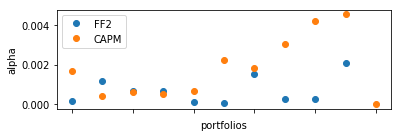

In [49]:
CAPM=TSresults.copy()
fig = plt.figure()
ax1 = plt.subplot(2,1,1)
FF2.alpha.abs().plot(ax=ax1,style='o')
CAPM.alpha.abs().plot(ax=ax1,style='o')

plt.legend(['FF2','CAPM'])
plt.ylabel('alpha') 
plt.xlabel('portfolios') 

In [50]:
url = "https://www.dropbox.com/s/9346pp2iu5prv8s/MonthlyFactors.csv?dl=1"
Factors = pd.read_csv(url,index_col=0, 
                         parse_dates=True,na_values=-99)
Factors=Factors/100
# keep only market and RF
Factors=Factors[['SMB']]
Factors.head()

df=pd.merge(df,Factors,left_index=True,right_index=True)
# no need to take out risk-free rate because these factors are already excess returns
df.mean()

BEME1     0.005859
BEME2     0.006873
BEME3     0.006907
BEME4     0.006643
BEME5     0.007234
BEME6     0.007923
BEME7     0.007247
BEME8     0.009139
BEME9     0.010582
BEME10    0.010701
MKT       0.006567
HML       0.003881
SMB       0.002101
dtype: float64

In [52]:
 
# indentical code as before. Just add the new factor to the regression
FF3=pd.DataFrame([],index=df.drop(['MKT','HML','SMB'],axis=1).columns,\
                 columns=['avg','alpha','talpha','betamkt','tbetamkt','betahml','tbetahml','betasmb','tbetasmb']) 
# create dataframe to store residual
FF3Resid=df.drop(['MKT','HML','SMB'],axis=1).copy()
#store avg return
FF3['avg']=df.drop(['MKT','HML','SMB'],axis=1).mean()

for portfolio in FF3.index:
    y=df[portfolio]
    x=df[['MKT','HML','SMB']]
    x=sm.add_constant(x)
    results = sm.OLS(y,x).fit()
    FF3.at[portfolio,['alpha','betamkt','betahml','betasmb']]=results.params.values
    FF3.at[portfolio,['talpha','tbetamkt','tbetahml','tbetasmb']]=(results.params/results.HC0_se).values
    FF3Resid[portfolio]=results.resid
    
FF3=FF3.astype('float') 

In [53]:
FF3

,avg,alpha,talpha,betamkt,tbetamkt,betahml,tbetahml,betasmb,tbetasmb
BEME1,0.005859,0.000238,0.593247,1.077310,82.355783,-0.335730,-16.584693,-0.071517,-3.429862
BEME2,0.006873,0.001203,2.915609,0.978093,53.194552,-0.191983,-8.126416,-0.003628,-0.179022
BEME3,0.006907,0.000712,1.574582,0.985597,80.273234,-0.047299,-2.251492,-0.044912,-1.811304
BEME4,0.006643,-0.000645,-1.195698,1.032342,44.057787,0.150828,4.297228,-0.036454,-1.063818
BEME5,0.007234,-0.000051,-0.099450,0.975060,62.852719,0.269975,11.086469,-0.079328,-2.910528
BEME6,0.007923,-0.000029,-0.051919,0.977335,46.786195,0.426588,11.835326,-0.057730,-2.171742
BEME7,0.007247,-0.001557,-2.890661,1.011114,57.561234,0.545901,22.565536,0.021461,0.939869
BEME8,0.009139,-0.000359,-0.781772,1.015229,74.359593,0.665348,26.286737,0.118281,4.044447
BEME9,0.010582,-0.000446,-0.831641,1.103299,68.040772,0.853545,32.186919,0.223243,7.868596
BEME10,0.010701,-0.002485,-3.338969,1.188464,51.942681,1.091556,27.878473,0.544897,14.733175


# GRS test for multifactor models



- Using multiple assets to test a model with multiple factors

Run Time-series regression asset by asset

$$R_i^e =\alpha_i+\sum_j\beta_{i,j} F_j^e+\epsilon_i$$

where $F_j^e$ are the different factors. All must be excess returns

- mkt
- hml
- smb

stack the alphas in a vector $\hat{\alpha}$

If you have N test assets you will have N time-series of residuals $\epsilon_i$

Use this to estimate the variance-covariance matrix of the assets  residual risk

$$\hat{\Sigma}_{\epsilon}=var([\epsilon_1,...,\epsilon_1])$$

This yield a N by N covariance matrix $\hat{\Sigma}_{\epsilon}$

Also estimate the factor covariance matrix  $\hat{\Sigma}_{F}$ and the factor expected return vector $\hat{\mu}_F$

$$T\left(1+\hat{\mu}\Sigma_F^{-1}\hat{\mu}'\right)^{-1}\hat{\alpha}\hat{\Sigma}_{\epsilon}^{-1}\hat{\alpha}' \sim Chi2(N)$$

In [48]:
FF3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, SMALL LoBM to BIG HiBM
Data columns (total 9 columns):
avg         25 non-null float64
alpha       25 non-null float64
talpha      25 non-null float64
betamkt     25 non-null float64
tbetamkt    25 non-null float64
betahml     25 non-null float64
tbetahml    25 non-null float64
betasmb     25 non-null float64
tbetasmb    25 non-null float64
dtypes: float64(9)
memory usage: 2.6+ KB


In [210]:
# first the factor moments
muF=df[['MKT','HML']].mean()
invCovF=np.linalg.inv(df[['MKT','HML']].cov())
# the size of the sample
T=df.shape[0]
# the inverse of the residual covariance matrix
invCov=np.matrix(np.linalg.inv(FF3Resid.cov()))
# the chi statistic!
chi=T*(1+(muF.values @ invCovF @ muF.values.T))**(-1)*(FF3.alpha.values @invCov@ FF3.alpha.values.T)
chi


matrix([[25.13356918]])

In [211]:
from scipy.stats import chi2
# choose degress of freedom (number of test assets)
dfreedom=FF3Resid.shape[1]
print(dfreedom)
# look at P-value

(1-chi2.cdf(chi,dfreedom))*100


10


array([[0.5097996]])



### Economic vs statistical rejection

We see that the eventhough the FF3 reduce pricing erros by a lot.

- So variation in the betas of the 3 factor model can explain much more of the variation in average returns across assets

At the same time the GRS test still stronly reject the model.

- What is going on?

Asset pricing tests are always about Sharpe ratios

The FF3 model explains much more of the variation in average returns-- that is true-- but at the same time explains also a lot of the variation in realized returns

This means that the unexplained risk is much smaller-- making Appraisal ratios not that different from the CAPM.

For a practioner: it is very different to have SR of 1 with an alpha of 5%, vs SR of 1 with alpha of 0.5%

Why?

Because you will have to use much more leverage to exploit mispricing from the FF3 model!

The GRS tests treats these two things as equal, but they are only the same if if you don't face any costs of leveraging up


### Discussion


#### Why test with portfolios rather than just look at stocks?

 i. Individual stocks have $\sigma$ = 40 − 80%, so $\sigma/\sqrt{T}$ makes it nearly impossible to accurately measure E(R). Portfolios have lower $\sigma$ by diversification.

ii. Betas are badly measured too, and vary over time. 
        
   - example: every firm starts small and risky, but eventually some of then become big and safe
        
iii. You need an interesting alternative. Group stocks together that might have a violation,
this gives much more power.

iv. This is what people do to (try to) make money. They don’t randomly buy stocks.
They buy stocks with certain characteristics that they think will outperform. Thus,
keep tests and practice close.

v. The CAPM seemed fine (and still does) until stocks were grouped by B/M. The
CAPM still works fine for some groupings (size), not others (value) .

But of course you need to know how to form portfolios which characteristcs to use.

And here the sky is the limit, as long you are careful about false discovery!

Examples:

- Stocks talked about in the media
- Stocks of CEOs tweeted by the President
- Stocks with recent deal annoucements
- Stocks with a lot of google search trafic (google trends)
- Stocks with a lot of Tweeter activity
- Stocks that are investing a alot
- Stocks that are very profitable
- Stocks that doing a lot of R&D
- Stocks invested by Famous hedge fund managers
- Stocks invested by less famous managers
- Stokcs invested by Warren Buffet


####  The basic approach is always the same.

1. Choose a characteristic that you have a hunch is correlated with expected returns
2. Construct a sort: quantile based, or categorical (tweeted/not tweented)
3. check what the average returns look like of the portfolio (not the individual stocks)
4. check if CAPM explains, or FF3, or....
5. Anomaly? must decide-> red pill or blue pill





#### Quantitative investing is going from "names"  to characterisitcs

The yearly sorting keeps the stocks inside the portfolios with similar characteristics

This sorting will "work" if these chracteristics are good proxies for risks that the average investor cares about

- will lead to spread in returns
- will lead to a factor

But it doesn't work always, if you use the first letter of stock ticker to construct 26 portfolios you are unlikely to get spread in average returns and most likely each portfolio will resemble the market portfolio but will much more volatility.

And even if you do find something--> likely garbage, very hard to think about an economic model that would deliver that pattern!


Lets look at the portfolios characteristics, i.e. size and Book-to-market of the different portfolios

This are the characterisitcs that were used to create the portfolios. 


* indeed, the key is that each portfolio has stocks of vastly different characterisitcs
* and keeps churning as firms change
* So when MSFT transitioned from being small in the 80 to be gigantic in the 90's it move up from the small to the big portfolios
* When in the Tech boom it had a huge valuation relative to it'sbook value, it wen to the low BM portfolios
* But then transtioned back to the high BM once it's market valuation collapsed in the aftermath of the techbuble
* The key is that firms change what they are, so by constructing the portfolios we can hope to estimate some stable relationship between risk and return
* The the fact that the market value is above or below the book value does not mean that the firm is mispriced. It is natural that expectations of future earnings change (this is not in book value) of investors perception of risk change.
* Even in a CAPM world you can see that happening: suppose the beta of a firm increases, then in equilibrium it's excess return must also increase! 
* This would market it's market value go down, Book-to-market would go up at the smae time that expected returns going froward would go up!

- But in the data BM changes (as firms swing across portfolios), but the market beta does not, which is inconsitent with the CAPM

- Expected return alone is not a puzzle. All puzzles are joint puzzles of expected return and beta — either high expected returns not matched by high betas, or high/low betas not matched by expected returns.

* The lower residual risk allows you a sharper exploration of the model mistakes

* There is always a telescope, a way to make small-looking errors big (and profitable.)